# EDA HIL Limited

## Importing Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading Data

In [2]:
data_path = r'/content/HIL_gwl_v3.csv'

In [3]:
data = pd.read_csv(data_path,index_col='date')
data.index = pd.to_datetime(data.index)
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light
date,,,,,,,
2023-01-01,102,9.23250,21.9,0.01,2.53,12.36,39054.18
2023-01-02,108,9.37075,20.7,0.00,2.47,12.29,39073.20
2023-01-03,82,9.54550,20.7,0.00,3.03,14.60,39093.97
2023-01-04,123,9.50625,19.4,0.00,3.20,15.07,39116.46
2023-01-05,121,9.55625,19.3,0.00,3.35,14.79,39140.61
...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.00,2.93,15.51,40013.74
2024-01-28,111,11.24250,17.8,0.00,3.12,16.96,40067.66
2024-01-29,121,11.44750,18.7,0.00,3.11,16.96,40122.34


## Descriptive Statistics

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Consumption (KL),396.0,117.760101,33.517734,0.0000,122.00000,128.000,133.00000,147.00
level (m),396.0,9.678443,2.869462,6.0325,6.93875,9.125,12.58375,14.80
temp,396.0,26.152273,4.088925,17.6000,23.10000,26.900,29.00000,35.00
rain,396.0,3.799482,9.313404,0.0000,0.00000,0.000,3.24250,104.35
evpt,396.0,4.095960,1.157903,0.9200,3.22000,4.035,4.79250,7.32
radiation,396.0,17.694545,3.954032,3.5700,15.13500,17.655,20.61250,25.57
day_light,396.0,43402.135682,3326.683528,38961.1300,40021.11250,43200.200,46678.40250,48388.47


## Overall TimeLine Plotting

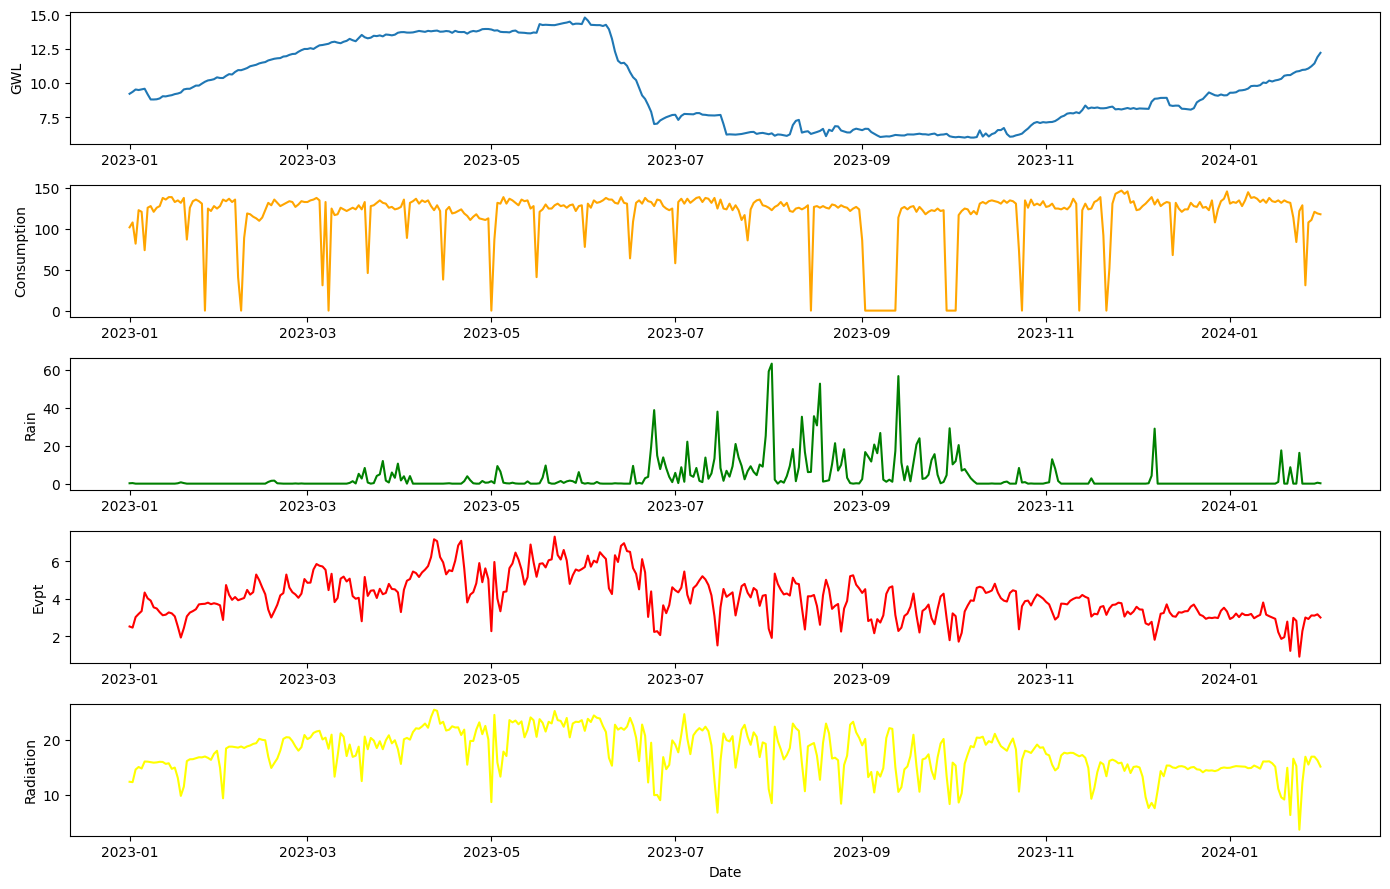

In [ ]:
fig,axs = plt.subplots(5,1,figsize=(14,9))

axs[0].plot(data['level (m)'])
axs[0].set_ylabel('GWL')

axs[1].plot(data['Consumption (KL)'],color='orange')
axs[1].set_ylabel('Consumption')

axs[2].plot(data['rain'],color='green')
axs[2].set_ylabel('Rain')

axs[3].plot(data['evpt'],color='red')
axs[3].set_ylabel('Evpt')


axs[4].plot(data['radiation'],color='yellow')
axs[4].set_ylabel('Radiation')
axs[4].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Correlation Matrix

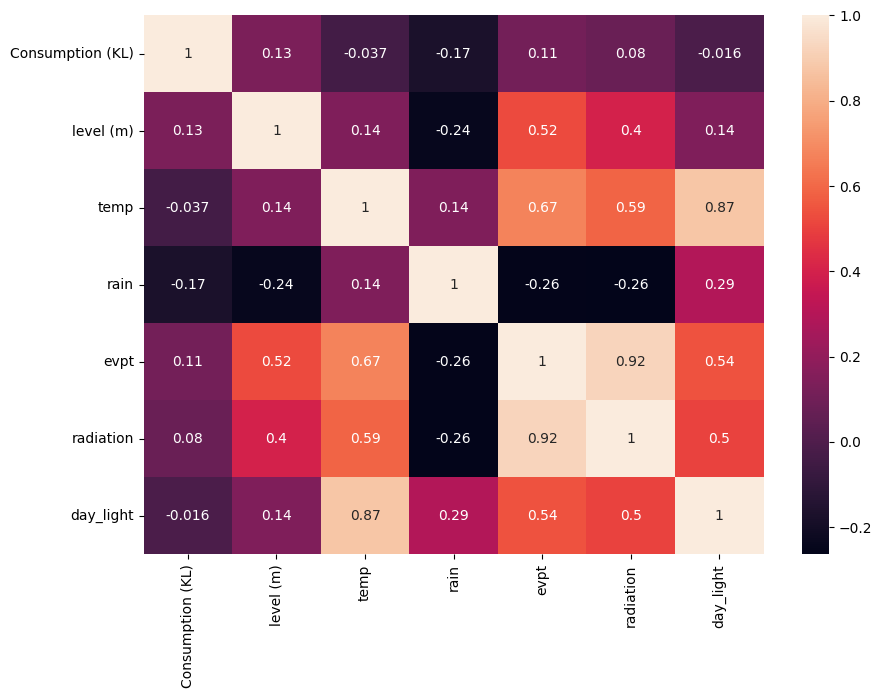

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

From the correlation matrix above, we can infer that there is a strong non-linear relationship between the predictors and the target variable.

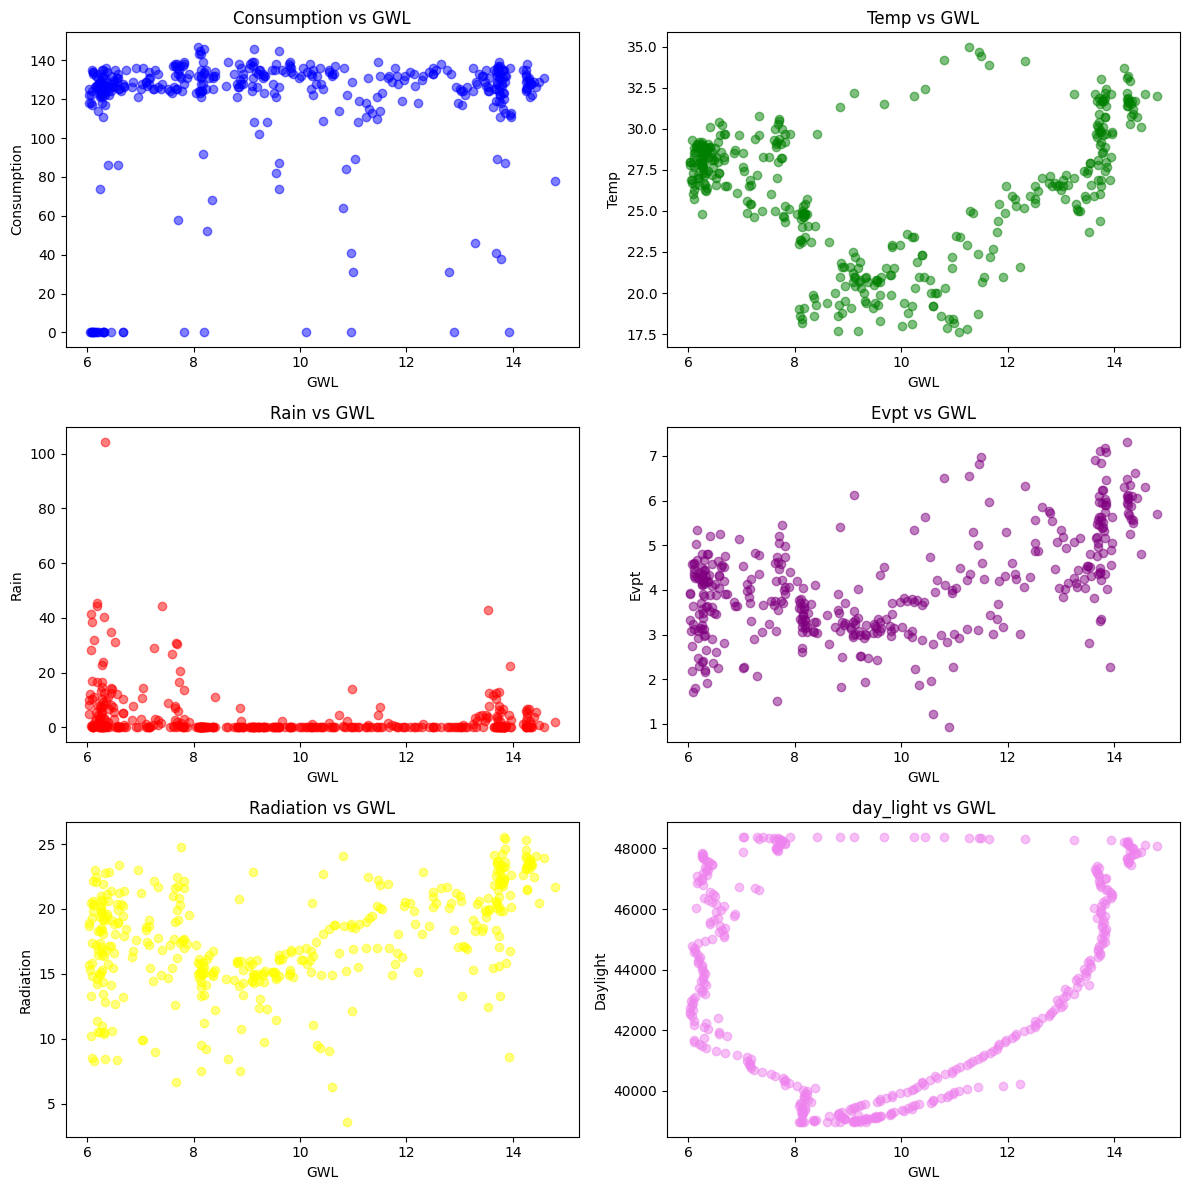

In [10]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plot the original data
axes[0].scatter(data.iloc[:,1], data.iloc[:, 0], color='blue', alpha=0.5)
axes[0].set_title('Consumption vs GWL')
axes[0].set_xlabel('GWL')
axes[0].set_ylabel('Consumption')

axes[1].scatter(data.iloc[:,1], data.iloc[:, 2], color='green', alpha=0.5)
axes[1].set_title('Temp vs GWL')
axes[1].set_xlabel('GWL')
axes[1].set_ylabel('Temp')

axes[2].scatter(data.iloc[:,1], data.iloc[:, 3], color='red', alpha=0.5)
axes[2].set_title('Rain vs GWL')
axes[2].set_xlabel('GWL')
axes[2].set_ylabel('Rain')

axes[3].scatter(data.iloc[:,1], data.iloc[:, 4], color='purple', alpha=0.5)
axes[3].set_title('Evpt vs GWL')
axes[3].set_xlabel('GWL')
axes[3].set_ylabel('Evpt')

axes[4].scatter(data.iloc[:,1], data.iloc[:, 5], color='yellow', alpha=0.5)
axes[4].set_title('Radiation vs GWL')
axes[4].set_xlabel('GWL')
axes[4].set_ylabel('Radiation')

axes[5].scatter(data.iloc[:,1], data.iloc[:, 6], color='violet', alpha=0.5)
axes[5].set_title('day_light vs GWL')
axes[5].set_xlabel('GWL')
axes[5].set_ylabel('Daylight')
# Adjust layout
plt.tight_layout()
plt.show()


## Time Series Decomposition of Groundwater Level

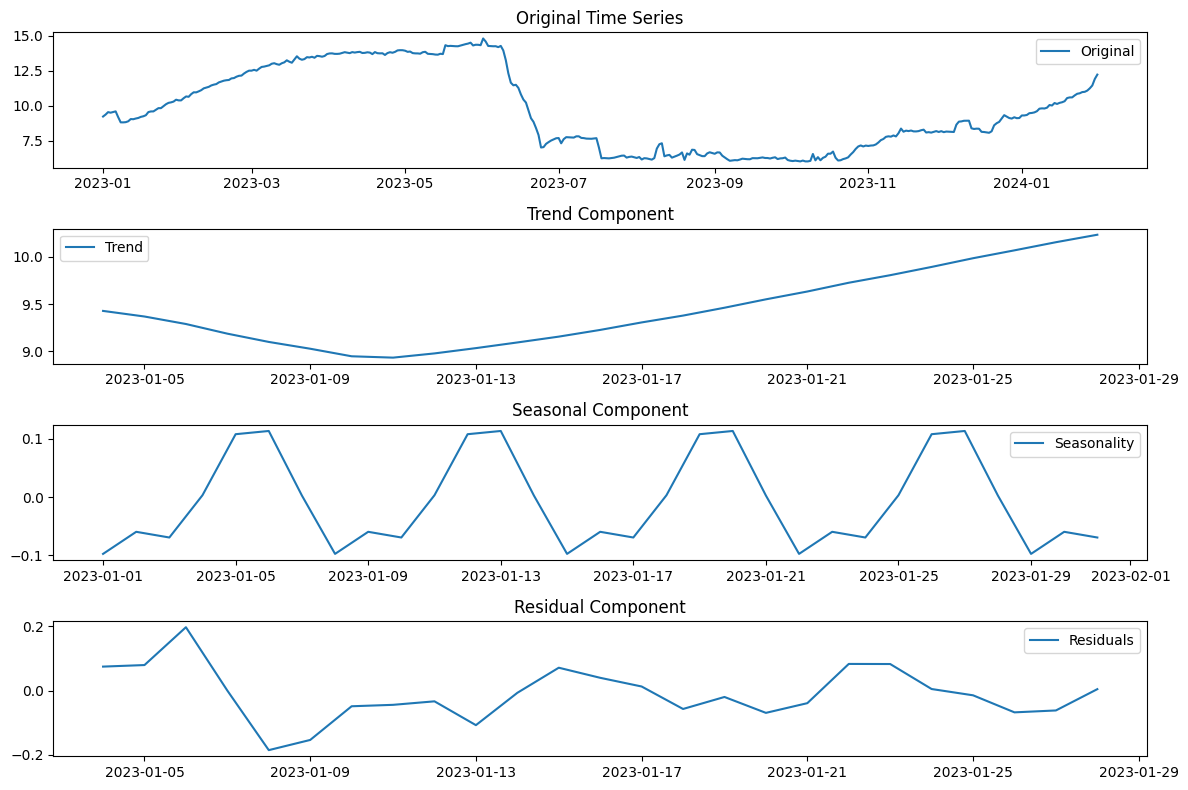

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data['level (m)'].loc[:'2023-01-31'], model='additive')

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['level (m)'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


Above plots show that their exists a weekly seasonality in the Groundwater level

Adding seasonal component as feature to the data

In [6]:
data['weekday'] = data.index.weekday

In [7]:
data.head()

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday
date,,,,,,,,
2023-01-01,102,9.23250,21.9,0.01,2.53,12.36,39054.18,6
2023-01-02,108,9.37075,20.7,0.00,2.47,12.29,39073.20,0
2023-01-03,82,9.54550,20.7,0.00,3.03,14.60,39093.97,1
2023-01-04,123,9.50625,19.4,0.00,3.20,15.07,39116.46,2
2023-01-05,121,9.55625,19.3,0.00,3.35,14.79,39140.61,3


## Partial Auto-correlation Plot

<Figure size 1500x600 with 0 Axes>

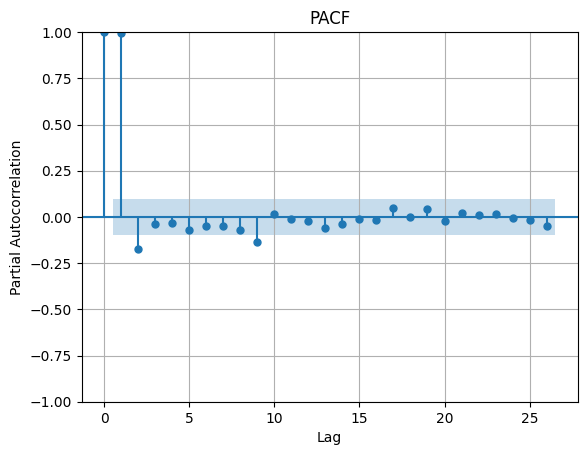

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(15, 6))
plot_pacf(data['level (m)'])  # You can adjust the number of lags as needed
plt.title('PACF')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

The partial auto-correlation plot above indicates that the current groundwater level is influenced by the groundwater level from the previous day.

Adding lag-1 term

In [12]:
data['lag_1'] = data['level (m)'].shift(1)
data = data.dropna()
data.head()

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-02,108,9.37075,20.7,0.0,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
2023-01-06,74,9.60000,18.3,0.0,4.34,16.07,39166.38,4,9.55625


### Final Data

In [13]:
data

,Consumption (KL),level (m),temp,rain,evpt,radiation,day_light,weekday,lag_1
date,,,,,,,,,
2023-01-02,108,9.37075,20.7,0.0,2.47,12.29,39073.20,0,9.23250
2023-01-03,82,9.54550,20.7,0.0,3.03,14.60,39093.97,1,9.37075
2023-01-04,123,9.50625,19.4,0.0,3.20,15.07,39116.46,2,9.54550
2023-01-05,121,9.55625,19.3,0.0,3.35,14.79,39140.61,3,9.50625
2023-01-06,74,9.60000,18.3,0.0,4.34,16.07,39166.38,4,9.55625
...,...,...,...,...,...,...,...,...,...
2024-01-27,108,11.08250,17.6,0.0,2.93,15.51,40013.74,5,10.99500
2024-01-28,111,11.24250,17.8,0.0,3.12,16.96,40067.66,6,11.08250
2024-01-29,121,11.44750,18.7,0.0,3.11,16.96,40122.34,0,11.24250
